In [5]:
%%javascript

# Bind cmd-shift-d to duplicate line of code
Jupyter.keyboard_manager.edit_shortcuts.add_shortcut('alt-shift-d', {
    help : 'Duplicate current line',
    help_index : 'zz',
    handler: function(env) {
        var cm=env.notebook.get_selected_cell().code_mirror;
        // get a position of a current cursor in a current cell
        var current_cursor = cm.doc.getCursor();

        // read a content from a line where is the current cursor
        var line_content = cm.doc.getLine(current_cursor.line);
        cm.execCommand('goLineEnd');
        cm.execCommand('newlineAndIndent');
        cm.execCommand('indentLess');
        cm.doc.replaceSelection(line_content);
        cm.doc.setCursor(current_cursor.line + 1, current_cursor.ch);
        return false;
    }}
);


<IPython.core.display.Javascript object>

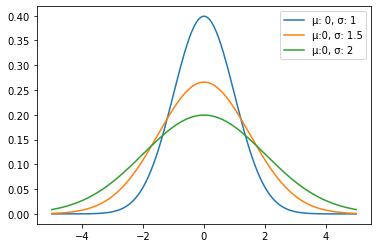

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#x-axis ranges from -5 and 5 with .001 steps
x = np.arange(-5, 5, 0.001)

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 0, 1), label='μ: 0, σ: 1')
plt.plot(x, norm.pdf(x, 0, 1.5), label='μ:0, σ: 1.5')
plt.plot(x, norm.pdf(x, 0, 2), label='μ:0, σ: 2')

#add legend to plot
plt.legend()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=42)

# Generate sample of 25 numbers
n = 25
clusters = []

for c in range(0,3):
    
    # Crude way to get different distributions
    # for each cluster
    p = rng.integers(low=1, high=6, size=4)
    
    df = pd.DataFrame({
        'x': rng.normal(p[0], p[1], n),
        'y': rng.normal(p[2], p[3], n),
        'name': f"Cluster {c+1}"
    })
    clusters.append(df)


In [2]:
import pandas as pd
s = 0
e = 100
inc =10
dob=lambda s,e,inc:[pd.Interval(i,i+inc,closed='left') if i<e-inc else pd.Interval(i,i+inc,closed='both') for i in range(s,e,inc)]
def dob1(s,e,inc):
    r = []
    for i in range(s,e,inc):
#         print(f'{i=}, {s=}, {e=}, {r=}')
#         import pdb; pdb.set_trace()
        if i<e-inc:
            r.append(pd.Interval(i,i+inc,closed='left'))
        else:
            r.append(pd.Interval(i,i+inc,closed='both'))
    return r


In [3]:
dob(s, e, inc)

[Interval(0, 10, closed='left'),
 Interval(10, 20, closed='left'),
 Interval(20, 30, closed='left'),
 Interval(30, 40, closed='left'),
 Interval(40, 50, closed='left'),
 Interval(50, 60, closed='left'),
 Interval(60, 70, closed='left'),
 Interval(70, 80, closed='left'),
 Interval(80, 90, closed='left'),
 Interval(90, 100, closed='both')]

In [4]:
dob1(s, e, inc)

[Interval(0, 10, closed='left'),
 Interval(10, 20, closed='left'),
 Interval(20, 30, closed='left'),
 Interval(30, 40, closed='left'),
 Interval(40, 50, closed='left'),
 Interval(50, 60, closed='left'),
 Interval(60, 70, closed='left'),
 Interval(70, 80, closed='left'),
 Interval(80, 90, closed='left'),
 Interval(90, 100, closed='both')]

In [23]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
#         "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,C,D
0,foo,-0.339310,-0.663418
1,bar,-0.020360,0.203771
2,foo,0.588680,0.002413
3,bar,0.236346,-2.863246
4,foo,0.504878,0.022289
5,bar,-0.279664,-1.321581
6,foo,-1.307869,-0.390657
7,foo,-0.202818,-0.548037


In [27]:
df.groupby('A').aggregate(['sum', 'count'])['C']['sum'].describe()


count    2.000000
mean    -0.410059
std      0.489857
min     -0.756440
25%     -0.583249
50%     -0.410059
75%     -0.236868
max     -0.063678
Name: sum, dtype: float64